In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

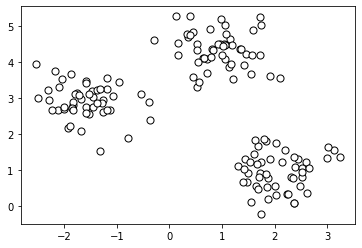

In [21]:
# make_blobs：生成聚类的数据集
# n_samples：生成的样本点个数，n_features：样本特征数，centers：样本中心数
# cluster_std：聚类标准差，shuffle：是否打乱数据，random_state：随机种子
X, y = make_blobs(n_samples=150, n_features=2,centers=3, cluster_std=0.5,shuffle=True, random_state=0)

# 散点图
# c：点的颜色，marker：点的形状，edgecolor：点边缘的形状，s：点的大小
plt.scatter(X[:, 0], X[:, 1],c='white', marker='o',edgecolor='black', s=50)
plt.show()

In [22]:
# 定义模型
# n_clusters：要形成的簇数，即k均值的k，init：初始化方式，tot：Frobenius 范数收敛的阈值
model = KMeans(n_clusters=3, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
# 训练加预测
y_pred = model.fit_predict(X)

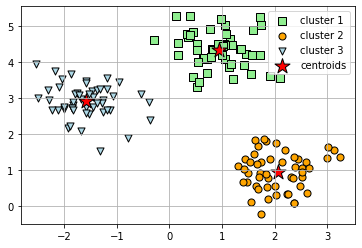

In [23]:
# 画出预测的三个簇类
plt.scatter(
    X[y_pred == 0, 0], X[y_pred == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_pred == 1, 0], X[y_pred == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_pred == 2, 0], X[y_pred == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# 画出聚类中心
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

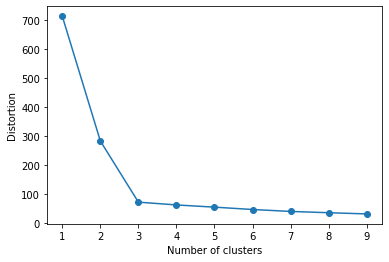

In [24]:
# 计算inertia随着k变化的情况
distortions = []
for i in range(1, 10):
    model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    model.fit(X)
    distortions.append(model.inertia_)
# 画图可以看出k越大inertia越小，追求k越大对应用无益处
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()